## Digit Recognizer

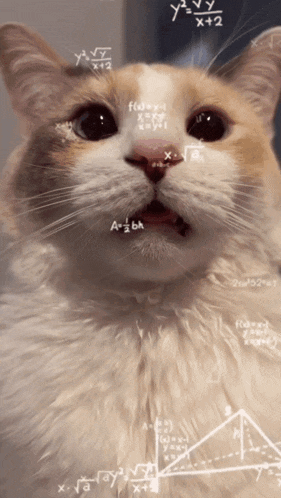

## Структура работы
<p><a href="#0">Глосcарий</a></p>
<p><a href="#1">Постановка задачи</a></p>
<p><a href="#2">Библиотеки</a></p>
<p><a href="#3">Config</a></p>
<p><a href="#4">TensorFlow граф</a></p>

<div id="0"></div><h2>Глосcарий</h2></div>

Видимый слой нейросети - слой нейронной сети, который принимает входные данные.

Скрытые слои - cлои нейронной сети, которые находятся между входным и выходным слоями.

Dropout - метод регуляризации для уменьшения переобучения в нейронных сетях. Характеризует исключение определённого процента случайных нейронов (находящихся как в скрытых, так и видимых слоях) на разных итерациях во время обучения нейронной сети.

One-hot векторы - это способ представления категориальных данных в виде бинарных векторов. Вектор имеет длину, равную количеству уникальных категорий, и содержит только одно "1" (и нули в остальных позициях), соответствующее индексу категории. Например, если у нас есть три категории "красный", "зеленый" и "синий", то их представление в виде one-hot векторов будет следующим:
"красный" -> [1, 0, 0]
"зеленый" -> [0, 1, 0]
"синий" -> [0, 0, 1]

Функция активации(передаточная функция)- математическая функция, которая применяется к входным данным каждого нейрона в сети.
Функция активации добавляет нелинейность к нейронной сети, позволяя ей выражать сложные зависимости между входными и выходными данными. Без нелинейности нейронная сеть была бы ограничена в своей способности обрабатывать сложные данные и решать сложные задачи.
Нелинейные функции активации помогают сетям принимать решения, разделяя входные данные не по прямым линиям, а более сложным и изогнутым образом, что значительно расширяет класс задач, которые могут быть решены с помощью нейронных сетей.

Батч(от англ. batch-партия, пачка, серия, группа) - представляет собой группу обучающих примеров, которые обрабатываются нейронной сетью.
Эпоха — один цикл обучения на массиве данных.
Итерация - один полный проход алгоритма через необходимые данные.

Производная функции - это математическое понятие, которое характеризует скорость изменения функции в данной точке.(Напишите более адекватно пожалуйста)

Градиент - это вектор, который определяет крутизну склона и указывает его направление относительно какой-либо из точек на поверхности или графике.

Градиентный спуск — метод нахождения локального или максимума минимума функции с помощью движения вдоль градиента.

Массив-это тип данных, в котором хранится упорядоченный набор однотипных элементов.

Многомерный массив-массив, который содержит в себе от 1 до бесконечности массивов.

Валидация - это процесс оценки производительности модели на отдельном наборе данных, который не использовался в процессе обучения с целью проверки её способности обобщения на новые данные.

Нормальное распределение - это статистическое распределение, в котором большинство значений сконцентрированы вокруг среднего значения, образуя колоколообразную кривую(пример:распределение iq у населения).

Усечённое нормальное распределение — это разновидность нормального распределения в котором значения выходящие за пределы некоторого интервала усекаются.


Заполнение отступов нулями(zero paded convolutions)-способ сохранения размера данных после свёртки. На краях создаются нули и таким образом размерность данных не изменяется.

Гиперпараметры - это параметры, которые влияют на качество работы нейронной сети, но не определяются в процессе обучения. В первую очередь это архитектура нейронной сети, а именно количество слоев и количество нейронов в каждом слое. Функции активации, которыйые используются в различных слоях. А также особенности обучения нейронной сети - тип оптимизатора, который используется при обучении, количество эпох обучения и многое другое.

<div id="2"></div><h2>Библиотеки</h2></div>

<ol>
<li>numpy - библиотека для работы с многомерными массивами.</li>
<li>pandas - библиотека для обработки и анализа данных. Работа с данными строится поверх библиотеки NumPy.</li>
<li>matplotlib - библиотека для визуализации данных двумерной и трёхмерной графикой.</li>
<li>tensorflow - библиотека для машинного обучения для решения задач построения и тренировки нейронной сети с целью автоматического нахождения и классификации образов, решения задач распознавания речи, анализа естественного языка и других задач.</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#для отображения и хранения графиков Matplotlib в блокноте Python Jupyter
%matplotlib inline 

#используется для отключения поведения версии 2.x и возвращения к поведению версии 1.x. Это было сделанно для того, чтобы код код TensorFlow 1 версии запускался в TensorFlow 2 версии.
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

2024-03-18 20:12:44.605671: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 20:12:44.608717: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 20:12:44.651355: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-18 20:12:45.389894: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
non-resource variables are not supported in the long term


<div id="3"></div><h2>Config</h2></div>

In [3]:
# коэффициент скорости обучения (1e-4 это 10 в -4 степени) 
LEARNING_RATE = 1e-4 

#Итерации — число батчей, необходимых для завершения одной эпохи.
TRAINING_ITERATIONS = 2500        

DROPOUT = 0.5

#Размер батча — это общее число тренировочных объектов, представленных в одном батче.
BATCH_SIZE = 50

#Размер валидационной выборки.
VALIDATION_SIZE = 2000

#номер изображения для отображения
IMAGE_TO_DISPLAY = 500

In [4]:
data = pd.read_csv('./train.csv')
#сохранение таблицы в переменную
pd.read_csv('train.csv')
#вывод таблицы

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
images = data.iloc[:,1:].values.astype(np.float32)

# конвертирую из [0:255] => [0.0:1.0]
images = np.multiply(images, 1.0 / 255.0)

In [7]:
image_size = images.shape[1]
print(image_size)
#image_width = image_height т.к все изображения - квадраты
image_width = image_height = np.sqrt(image_size).astype(np.uint8)
#Этот код использует библиотеку NumPy для вычисления квадратного корня от значения image_size и преобразования результата
#в целое число без знака (uint8) с помощью метода astype(). 
print ('Image resolution:width:{0}px  height:{1}px'.format(image_width,image_height))

784
Image resolution:width:28px  height:28px


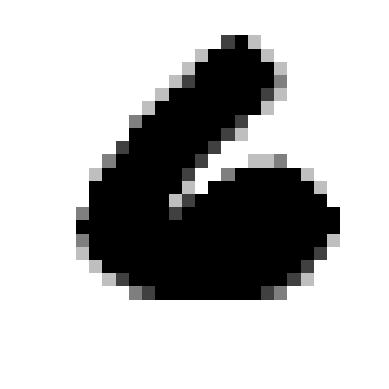

In [8]:
#функция отображения изображения
def display(img):
    #перевод одномерного массива в двумерный массив с размерами image_width на image_height. (784) => (28,28)
    one_image = img.reshape(image_width,image_height)
    #отключение отображения осей координат на изображении.
    plt.axis('off')
    #отображение изображения с использованием цветовой карты 'binary' (оттенки серого).
    plt.imshow(one_image, cmap=cm.binary)
    
display(images[IMAGE_TO_DISPLAY])

###### .values в Pandas

.values() возвращает массив NumPy, в котором представленны табличные данные из DataFrame.
DataFrame в Pandas является двумерной структурой данных как таблица. Состоит из строк и столбцов где каждый столбец может содержать данные различных типов. 
Формат NumPy представляет собой массив данных, который может быть многомерным. В основном они предназначены для работы с числовыми данными и оптимизированы для эффективных вычислений с числами, но NumPy также предоставляет возможность хранить элементы и других типов данных.

###### 

In [9]:
#извлекаем значения из столбца 0 из массива data и сохраняем их в массив labels_flat.
labels_flat = data.iloc[:,0].values
print('кол-во элементов в labels_flat:{0}'.format(len(labels_flat)))
#вывод значения метки для изображения с номером IMAGE_TO_DISPLAY из массива
print ('{0}-й элемент - это цифра {1}'.format(IMAGE_TO_DISPLAY,labels_flat[IMAGE_TO_DISPLAY]))

кол-во элементов в labels_flat:42000
500-й элемент - это цифра 6


У нас существует десять различных цифр / меток / классов.

In [10]:
#поиск уникальных значений в массиве labels_flat
labels_count = np.unique(labels_flat).shape[0]
print('уникальных элементов: {0}'.format(labels_count))

уникальных элементов: 10


In [11]:
print(type(labels_flat))
print(labels_flat.dtype)
print(labels_flat[:100])

<class 'numpy.ndarray'>
int64
[1 0 1 4 0 0 7 3 5 3 8 9 1 3 3 1 2 0 7 5 8 6 2 0 2 3 6 9 9 7 8 9 4 9 2 1 3
 1 1 4 9 1 4 4 2 6 3 7 7 4 7 5 1 9 0 2 2 3 9 1 1 1 5 0 6 3 4 8 1 0 3 9 6 2
 6 4 7 1 4 1 5 4 8 9 2 9 9 8 9 6 3 6 4 6 2 9 1 2 0 5]


###### np.arange

###### 

In [12]:
#преобразование в one-hot vector (смотреть глоссарий)

#42000 и 10
def dense_to_one_hot(labels_dense, num_classes):
    #Получаем количество меток
    num_labels = labels_dense.shape[0]
    #Создаем смещение индекса для каждой метки
    index_offset = np.arange(num_labels) * num_classes
    #Создаём матрицу заполненную нулями для one-hot encoding
    #в данном случае будет созданно 42000 столбцов по 10 элементов
    labels_one_hot = np.zeros((num_labels, num_classes))
    #Ставим значения 1 в соответствующих позициях
    #функция .ravel возвращает одномерный массив, содержащий входные элементы
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    
    return labels_one_hot


labels = dense_to_one_hot(labels_flat, labels_count).astype(np.uint8)

print('The size of an array with one hot vectors:{0[0]}x{0[1]}'.format(labels.shape))
print ('One-hot vector image {0}:{1}'.format(IMAGE_TO_DISPLAY,labels[IMAGE_TO_DISPLAY]))

The size of an array with one hot vectors:42000x10
One-hot vector image 500:[0 0 0 0 0 0 1 0 0 0]


In [13]:
# разделяю данные на обучение и валидацию

validation_images = images[:VALIDATION_SIZE]
validation_labels = labels[:VALIDATION_SIZE]

train_images = images[VALIDATION_SIZE:]
train_labels = labels[VALIDATION_SIZE:]

print('Изображений для обучения:{0[0]}'.format(train_images.shape))
print('Изображений для валидации:{0[0]}'.format(validation_images.shape))

training images:40000
validation images:2000


<div id="4"></div><h2>TensorFlow граф</h2></div>

В моём случае я решил использовать функцию активации Relu. 
Она имеет следующую формулу f(x)=max(0,x) и реализует простой пороговый переход в нуле.

#### Плюсы:
1. Требует мало вычислительных мощностей и соответственно имеет большую скорость работы.
2. Не подвержен насыщению (Крайне нежелательное свойство сигмоиды заключается в том, что при насыщении функции с той или иной стороны (0 или 1), градиент на этих участках становится близок к нулю).


#### Минусы:

1. Не всегда надежны и в процессе обучения могут выходить из строя (умирать). Когда веса нейрона обновляются так, что для всех входов ReLU активации становится отрицательной, нейрон больше не будет выдавать положительный выход для любых входных данных и будет считаться "мертвым". Решается посредством выбора подходящей скорости обучения или использования модифицированной функция активации.

In [14]:
# инициализация весов и смещений
def weight_variable(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))
    #tf.Variable(...): Создает TensorFlow-переменную, которая будет содержать веса нейронов.  
    #(или ядер, если это веса сверточных слоев). Веса инициализируются значениями из усеченного нормального распределения(смотреть глоссарий).

def bias_variable(shape):
    return tf.Variable( tf.constant(0.1, shape=shape))

При свёртке есть проблема уменьшения размера выходных данных. Для исправления это используем заполнение нолями.

In [15]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

Max pooling - 2x2.

Max pooling(Уменьшение размерности) Max pooling позволяет уменьшить размер данных, сохраняя при этом наиболее важные признаки. Это ускоряет обучение и уменьшает количество параметров модели.

Уменьшение чувсвительности к масштабу и местоположению: Max pooling делает модель менее чувствительной (улучшает результат) к небольшим изменениям в масштабе и местоположении объектов на изображении.

In [16]:
# пулинг
# [[0,3],
#  [4,2]] => 4

# [[0,1],
#  [1,1]] => 1

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [ ]:
Создание входов и выходов нейросети

In [18]:
# input & output of NN

# images
#В нашем случае image_size = 784
x = tf.placeholder(tf.float32, shape=[None, image_size])
# labels
#Кол во выходов. У нас labels_count = 10
y_ = tf.placeholder('float', shape=[None, labels_count])

#### Создание слоёв

Фильтр(ядро) - это матрица определённого размера проходящая по всему изображению во время свертки.


Первый слой - свертка, за ним следует макс пулинг. Свертка вычисляет 32 тензера для каждого фильтра 5x5. Его весовой тензор имеет форму [5, 5, 1, 32]. Первые два значения - это размер фильтра, следующее - количество входных каналов(например в rgb будет 3 канала), последнее - количество выходных каналов.

После свертки пуллингом уменьшаем размер вывода с 28x28 до 14x14.


In [19]:
# первый сверточный слой
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

# (40000,784) => (40000,28,28,1)
image = tf.reshape(x, [-1,image_width , image_height,1])
print (image.get_shape()) # =>(40000,28,28,1)

h_conv1 = tf.nn.relu(conv2d(image, W_conv1) + b_conv1)
print (h_conv1.get_shape()) # => (40000, 28, 28, 32)
h_pool1 = max_pool_2x2(h_conv1)
print (h_pool1.get_shape()) # => (40000, 14, 14, 32)

# подготовка для визуализации 32 признаков в сетке 4 на 8
layer1 = tf.reshape(h_conv1, (-1, image_height, image_width, 4 ,8))  
layer1 = tf.transpose(layer1, (0, 3, 1, 4,2))
layer1 = tf.reshape(layer1, (-1, image_height*4, image_width*8)) 

(?, 28, 28, 1)
(?, 28, 28, 32)
(?, 14, 14, 32)


Второй слой имеет 64 тензера для каждого фильтра 5х5. Его весовой тензор имеет форму [5, 5, 32, 64].

Поскольку изображение подвергается понижению разрешения путем пуллинга до размера 14x14, второй сверточный слой получает более общие признаки изображений. Фильтры занимают больше места на картинке. Таким образом, он настроен на более общие признаки, в то время как первый слой находит мелкие детали.

In [20]:
                # второй сверточный слой
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
print (h_conv2.get_shape()) # => (40000, 14,14, 64)
h_pool2 = max_pool_2x2(h_conv2)
print (h_pool2.get_shape()) # => (40000, 7, 7, 64)

# для визуализации 64 признаков в сетке 4 на 16
layer2 = tf.reshape(h_conv2, (-1, 14, 14, 4 ,16))  
layer2 = tf.transpose(layer2, (0, 3, 1, 4,2))
layer2 = tf.reshape(layer2, (-1, 14*4, 14*16)) 

(?, 14, 14, 64)
(?, 7, 7, 64)


После уменьшения размера изображения до 7х7, подадим полученный результат на вход полносвязной нейросети из 1024 нейронов, чтобы обработать все полученные матрицы. Для этого вначале надо все матрицы объеденим в 1 массив.

In [21]:
# полносвязный слой
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

# (40000, 7, 7, 64) => (40000, 3136)
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])

h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
#print (h_fc1.get_shape()) # => (40000, 1024)